In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score as ss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

To understand Average silhouette method see <a href="http://www.sthda.com/english/wiki/print.php?id=239#average-silhouette-method">click</a>
also <a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">see</a>.

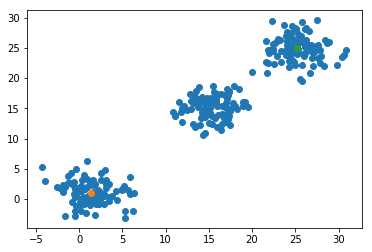

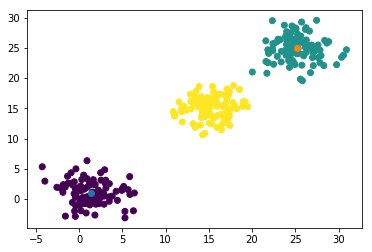

In [37]:
# genrate random data 
n = 100
x1 = np.random.normal(1, 2,n)
y1 = np.random.normal(1, 2,n)

x2 = np.random.normal(15, 2,n)
y2 = np.random.normal(15, 2,n)

x3 = np.random.normal(25, 2,n)
y3 = np.random.normal(25, 2,n)

# Combine the above arrays into one
comb_x = np.concatenate((x1 , x2, x3), axis = 0)
comb_y = np.concatenate((y1 , y2, y3), axis = 0)

data = pd.DataFrame(comb_x, columns = ['x'] )
data.loc[:, 'y'] = comb_y
data.head(4)

# Compute k-means
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)

centers = kmeans.cluster_centers_
pred = kmeans.predict(data)
# centers[row][col]

# Plot real data first with cluster centers
plt.scatter(data['x'],data['y'])
plt.scatter(centers[0][0], centers[0][1] )
plt.scatter(centers[1][0], centers[1][1] )
plt.show()


# Plot clusters calculated using k-means 
plt.scatter(data['x'],data['y'], c= pred)
plt.scatter(centers[0][0], centers[0][1] )
plt.scatter(centers[1][0], centers[1][1] )
plt.show()

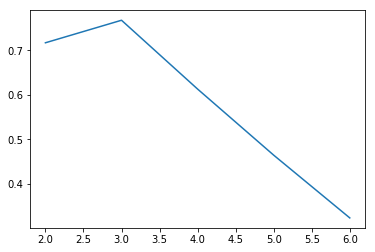

In [38]:
# Calculate silhouette score
clust = [2,3,4,5,6]

sil_avg = []
for i in clust:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    pred = kmeans.predict(data)
    sil_avg.append(np.array(ss(data, pred)))
   
   

plt.plot(clust,sil_avg)
plt.show()